In [ ]:
import torch

In [ ]:
def fun(x):
  return (x-2)**2

In [ ]:
x_curr = 3.5
x_param = torch.nn.Parameter(torch.tensor([x_curr]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=0.1)

In [ ]:
for epoch in range(60):
  optimizer.zero_grad()
  loss = fun(x_param)
  loss.backward()
  print(loss, x_param)
  optimizer.step()
print(x_param)

tensor([2.2500], grad_fn=<PowBackward0>) Parameter containing:
tensor([3.5000], requires_grad=True)
tensor([1.4400], grad_fn=<PowBackward0>) Parameter containing:
tensor([3.2000], requires_grad=True)
tensor([0.9216], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.9600], requires_grad=True)
tensor([0.5898], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.7680], requires_grad=True)
tensor([0.3775], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.6144], requires_grad=True)
tensor([0.2416], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.4915], requires_grad=True)
tensor([0.1546], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.3932], requires_grad=True)
tensor([0.0990], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.3146], requires_grad=True)
tensor([0.0633], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.2517], requires_grad=True)
tensor([0.0405], grad_fn=<PowBackward0>) Parameter containing:
tensor([2.2013], requires_grad=True)


In [ ]:
print(x_param.data)

tensor([2.0000])


In [ ]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)
print(X.shape, len(y))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) 70000


In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
class SimpleDataset(Dataset):
  def __init__(self, X, y):
    super(SimpleDataset, self).__init__()
    self.X = X
    self.y = y
  def __getitem__(self, index):
    """
    It is recommonded that all pre-processing should be done
    in the getitem function, because when GPU is busy at that
    time this pre-processing will work parallely and hence
    complete utilization of the infrastructure
    """
    inputs = torch.tensor(self.X[index, :], dtype=torch.float32)
    targets = torch.tensor(int(self.y[index]), dtype = torch.int64)
    return inputs, targets
  def __len__(self):
    return self.X.shape[0]

dataset = SimpleDataset(X, y)


In [ ]:
len(dataset)
# example, label = dataset[0]

70000

In [ ]:
example, label = dataset[0]

In [ ]:
example.shape, label

(torch.Size([784]), tensor(5))

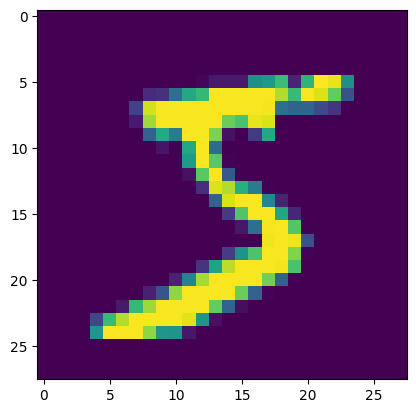

In [ ]:
import matplotlib.pyplot as plt
plt.imshow((example.view((28, 28))))

In [ ]:
from torch.utils.data import DataLoader
ds_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
for batch in ds_dataloader:
  print(batch)
  break

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([7, 8, 0, 4, 1, 6, 2, 0, 9, 2, 8, 6, 8, 1, 2, 0, 8, 9, 1, 6, 6, 7, 2, 6,
        8, 8, 1, 7, 0, 3, 8, 1, 1, 2, 0, 5, 0, 7, 4, 0, 1, 9, 7, 0, 9, 4, 9, 0,
        0, 3, 8, 3, 8, 1, 7, 5, 7, 0, 7, 7, 7, 0, 3, 3])]


Linear Model

In [ ]:
import numpy as np
from torch.utils.data import Dataset
import seaborn as sns
from tqdm import tqdm
from torch.utils.data import DataLoader

In [ ]:
X = np.linspace(0, 20, num=200)
X.shape

(200,)

In [ ]:
np.random.normal(size = 2)

array([0.19131906, 0.03944939])

In [ ]:
y = X + np.sin(X)*2 + np.random.normal(size = X.shape)

<Axes: >

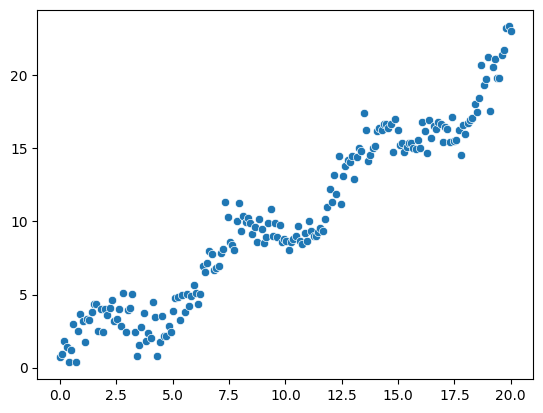

In [ ]:
sns.scatterplot(x=X, y=y)

In [ ]:
class SimpleRegressionDataset(Dataset):
  def __init__(self, X, y):
    super(SimpleRegressionDataset, self).__init__()
    self.X = X.reshape(-1, 1)
    self.y = y.reshape(-1, 1)
  def __getitem__(self, index):
    X = torch.tensor(self.X[index, :], dtype = torch.float32)
    y = torch.tensor(self.y[index, :], dtype = torch.float32)
    return X, y
  def __len__(self):
    return self.X.shape[0]

train_dataloader = DataLoader(SimpleRegressionDataset(X, y), batch_size=1, shuffle = True)


In [ ]:
# next(iter(train_dataloader))

In [ ]:
w = 3.5
w_param = nn.Parameter(torch.tensor([w], dtype = torch.float32), requires_grad = True)
w_param

Parameter containing:
tensor([3.5000], requires_grad=True)

In [ ]:
import numpy as np
w_param.detach().cpu().numpy().astype(np.int64)

array([3])

In [ ]:
x = torch.randn((3,4))
y = torch.argmax(x, dim = 1)
y, type(y)

(tensor([2, 3, 1]), torch.Tensor)

In [ ]:
# !pip install torchmetrics

In [ ]:
#from torchmetrics.functional import precision_recall

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
def train_simple_network(model, loss_func, train_dataloader, device, epochs= 20, val_dataloader = None, debug_step = 50):
  optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)
  model.to(device)
  train_loss = []
  eval_loss = []
  # for epoch in tqdm(range(epochs), desc = "Epoch"):
  for epoch in range(epochs):
    model = model.train()
    running_loss = 0.0
    step = 0
    # for inputs, labels in tqdm(train_dataloader, desc = "Train Batch", leave=False):
    for inputs, labels in train_dataloader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      y_hat = model(inputs)
      loss = loss_func(y_hat, labels)

      if step % debug_step == 0:
        print(f"step: {step}| step train loss: {loss}")
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      step += 1
    train_loss.append(running_loss/len(train_dataloader))
    print(f'epoch: {epoch}| train loss: {running_loss/len(train_dataloader)}')
    if val_dataloader:
      model.eval()
      running_eval_loss = 0.0
      step = 0
      loss = None
      # for inputs, labels in tqdm(val_dataloader, desc = "Eval Batch", leave = False):
      pred_labels = []
      gold_labels = []
      for inputs, labels in val_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
          y_hat = model(inputs)
          loss = loss_func(y_hat, labels)
          pred_label = torch.argmax(y_hat, dim = 1).numpy()
          pred_labels.extend(pred_label)
          gold_labels.extend(labels.detach().cpu().numpy().astype(int))
        if step% debug_step == 0:
          print(f'eval step: {step}|step eval loss: {loss.item()}')
        running_eval_loss += loss.item()
        step += 1
      eval_loss.append(running_eval_loss/len(val_dataloader))
      # print("gold_labels: ",  gold_labels)
      # print("pred_labels: ",  pred_labels)
      prec = precision_score(gold_labels, pred_labels,average='micro')
      recall = recall_score(gold_labels, pred_labels, average='micro')
      print(f'epoch: {epoch}| eval loss: {running_eval_loss/len(val_dataloader)}| prec: {prec}| recall: {recall}')
  return train_loss, eval_loss





In [ ]:
in_features = 1
out_features = 1
model = torch.nn.Linear(in_features, out_features)
loss_func = torch.nn.MSELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
train_loss, eval_loss = train_simple_network(model, loss_func, train_dataloader, device )

<Axes: >

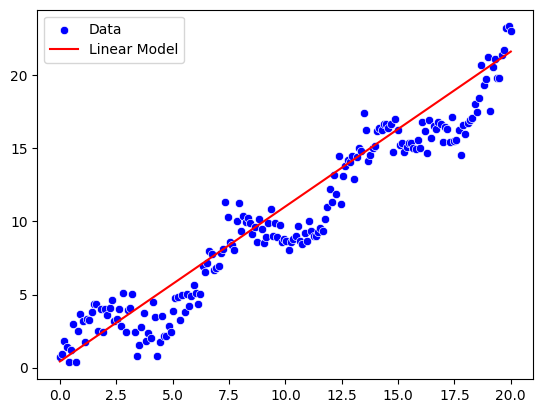

In [ ]:
with torch.no_grad():
  Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()
sns.scatterplot(x = X, y = y, color = 'blue', label = 'Data')
sns.lineplot(x = X, y = Y_pred.squeeze(axis=1), color = 'red', label = 'Linear Model')

In [ ]:
Y_pred.squeeze(axis = -1)

array([ 0.14536507,  0.24749915,  0.34963322,  0.45176727,  0.5539014 ,
        0.6560354 ,  0.7581695 ,  0.8603036 ,  0.9624377 ,  1.0645717 ,
        1.1667058 ,  1.26884   ,  1.370974  ,  1.473108  ,  1.5752422 ,
        1.6773763 ,  1.7795104 ,  1.8816444 ,  1.9837785 ,  2.0859125 ,
        2.1880465 ,  2.2901807 ,  2.3923147 ,  2.4944487 ,  2.5965827 ,
        2.6987169 ,  2.8008509 ,  2.9029849 ,  3.005119  ,  3.1072533 ,
        3.2093873 ,  3.3115213 ,  3.4136555 ,  3.5157895 ,  3.6179235 ,
        3.7200575 ,  3.8221917 ,  3.9243257 ,  4.0264597 ,  4.128594  ,
        4.230728  ,  4.3328624 ,  4.4349966 ,  4.5371304 ,  4.6392646 ,
        4.7413983 ,  4.8435326 ,  4.945667  ,  5.0478005 ,  5.149935  ,
        5.252069  ,  5.3542027 ,  5.456337  ,  5.558471  ,  5.660605  ,
        5.762739  ,  5.8648734 ,  5.9670076 ,  6.069142  ,  6.1712756 ,
        6.27341   ,  6.375544  ,  6.477678  ,  6.579812  ,  6.6819463 ,
        6.78408   ,  6.8862143 ,  6.988348  ,  7.090482  ,  7.19

Convolution

In [ ]:
import torchvision
from torchvision import transforms

In [ ]:
mnist_data_train = torchvision.datasets.MNIST("./data", train=True, download=True, transform = transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST("./data", train=False, download=True, transform = transforms.ToTensor())
x_example, y_example = mnist_data_train[0]
type(x_example)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5474905.71it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160003.82it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1504864.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3175088.13it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Tensor

In [ ]:
x_example.shape

torch.Size([1, 28, 28])

In [ ]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(device)
B = 32
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_train, batch_size=B)

cpu


In [ ]:
batchs, labels = next(iter(mnist_train_loader))

In [ ]:
batchs.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
labels[:10], type(labels)

(tensor([4, 1, 9, 4, 8, 5, 5, 4, 2, 8]), torch.Tensor)

In [ ]:
w = h = batchs.shape[-1] #height size
D = w * h
C = 1
classes = 10
filters = 16
K = 3 #filter size

model_linear = nn.Sequential(
  nn.Flatten(), # (B, C, W, H) -> (B, C*W*H) = (B,D)
  nn.Linear(D, 256),
  nn.Tanh(),
  nn.Linear(256, classes),
)

model_conv = nn.Sequential(
    nn.Conv2d(C, filters,K, padding = K//2),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(filters*D, classes)
)

In [ ]:
loss_func = nn.CrossEntropyLoss()
# train_loss, eval_loss = train_simple_network(model_conv, loss_func, mnist_train_loader, device, epochs= 10, val_dataloader = mnist_test_loader, debug_step=500)
train_loss, eval_loss = train_simple_network(model_linear, loss_func, mnist_train_loader, device, epochs= 10, val_dataloader = mnist_test_loader, debug_step=500)

step: 0| step train loss: 2.2986719608306885
step: 500| step train loss: 2.1217212677001953
step: 1000| step train loss: 1.8696929216384888
step: 1500| step train loss: 1.664557933807373
epoch: 0| train loss: 1.9480614693323772
eval step: 0|step eval loss: 1.630637288093567
eval step: 500|step eval loss: 1.736754298210144
eval step: 1000|step eval loss: 1.546022653579712
eval step: 1500|step eval loss: 1.4941692352294922
epoch: 0| eval loss: 1.5823017171859741| prec: 0.7444| recall: 0.7444
step: 0| step train loss: 1.5025311708450317
step: 500| step train loss: 1.4019668102264404
step: 1000| step train loss: 1.3372021913528442
step: 1500| step train loss: 1.2187888622283936
epoch: 1| train loss: 1.2875977821032205
eval step: 0|step eval loss: 1.1141737699508667
eval step: 500|step eval loss: 1.3025850057601929
eval step: 1000|step eval loss: 1.0124839544296265
eval step: 1500|step eval loss: 0.9133811593055725
epoch: 1| eval loss: 1.0493716993967692| prec: 0.7980666666666667| recall: 0

In [ ]:
train_loss

[0.8294506362994511,
 0.4274165951569875,
 0.37152264062960944,
 0.3458221882065137,
 0.32987487610379856,
 0.31878250342408815,
 0.30993047945896784,
 0.30339582693775496,
 0.2976038325190544,
 0.29264196798801423]

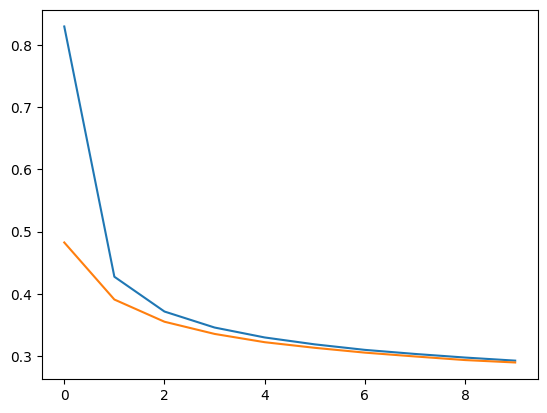

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(eval_loss)